In [1]:
import numpy as np
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

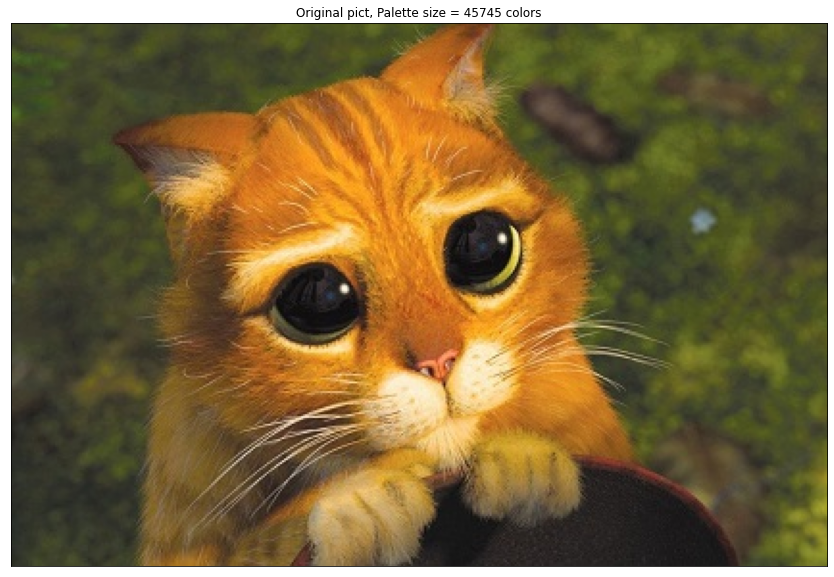

In [2]:
image = cv.imread('cat.jpg')  
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.figure(figsize=(20, 10))
plt.imshow(image)
plt.yticks([])
plt.xticks([])
_ = plt.title('Original pict, Palette size = {0} colors'.format(np.unique(image.reshape((image.shape[0] * image.shape[1],
                                                                                         image.shape[2])), axis=0).shape[0]))

In [3]:
n = 100
stacked_image = image.reshape((image.shape[0] * image.shape[1], image.shape[2]))

In [4]:
model = KMeans(n_clusters=n, random_state=0).fit(stacked_image)

In [5]:
new_image = np.ndarray((image.shape[0], image.shape[1], image.shape[2]), dtype='uint8')

In [6]:
for i in range(0, image.shape[0]):
    for j in range(0, image.shape[1]):
        new_image[i, j, :] = model.cluster_centers_[model.labels_[i * image.shape[1] + j]]

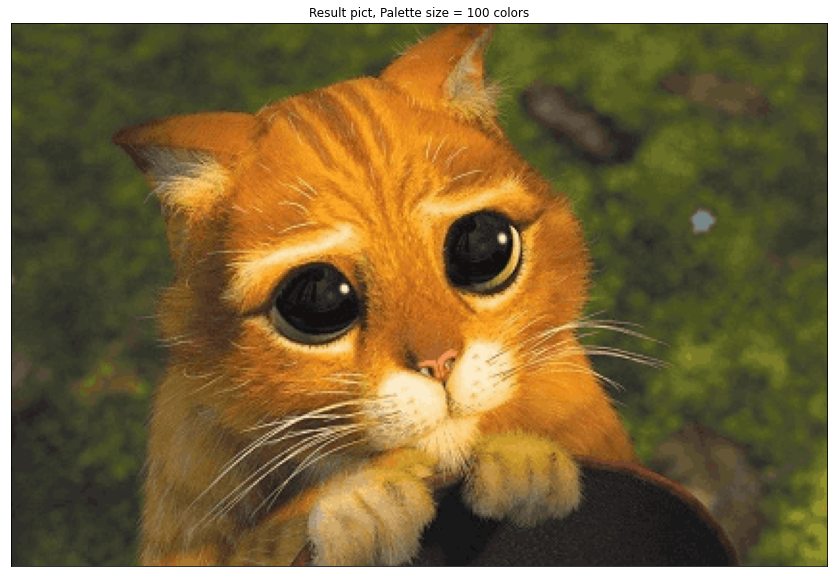

In [7]:
plt.figure(figsize=(20, 10))
plt.imshow(new_image)
plt.yticks([])
plt.xticks([])
_ = plt.title('Result pict, Palette size = {0} colors'.format(np.unique(new_image.reshape((new_image.shape[0] * new_image.shape[1],
                                                                                           new_image.shape[2])), axis=0).shape[0]))